# Modelling After Feature Engineering

## Goals
- Evaluate model performance after feature engineering

## Imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor

from basic_testing_script import cv_models, create_submission

In [36]:
train = pd.read_csv('train_processed.csv')
test = pd.read_csv('test_processed.csv')

features = train.iloc[:, :-1]
target = train.iloc[:, -1]

target_transformed = np.log1p(target)

In [ ]:
results_df, _ = cv_models(features, target_transformed)
results_df

Training Ridge...
Ridge - Training completed in 1.60 seconds.
--------------------------------------------------
Training Lasso...
Lasso - Training completed in 2.59 seconds.
--------------------------------------------------
Training ElasticNet...
ElasticNet - Training completed in 2.46 seconds.
--------------------------------------------------
Training SVR...
SVR - Training completed in 1.27 seconds.
--------------------------------------------------
Training RandomForest...
RandomForest - Training completed in 12.82 seconds.
--------------------------------------------------
Training GradientBoostingRegressor...
GradientBoostingRegressor - Training completed in 4.61 seconds.
--------------------------------------------------
Training LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003177 seconds.
You can set `force_row_wise=true` to remove the overhead

,Model,Mean RMSE,Std RMSE,Training Time (s)
5,GradientBoostingRegressor,0.126208,0.020872,4.609293
6,LightGBM,0.128256,0.018471,5.933816
7,XGBoost,0.135197,0.020205,2.554586
0,Ridge,0.138041,0.041291,1.603407
4,RandomForest,0.138773,0.021034,12.817242
2,ElasticNet,0.148157,0.043236,2.464643
1,Lasso,0.148172,0.043187,2.593270
3,SVR,0.337900,0.032853,1.265912


In [27]:
gbr = GradientBoostingRegressor()
gbr.fit(features, target_transformed)
create_submission(test, gbr, 'second_submission_GBR.csv')

In [28]:
lgbm = LGBMRegressor()
lgbm.fit(features, target_transformed)
create_submission(test, lgbm, 'second_submission_lgbm.csv')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004693 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4315
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 183
[LightGBM] [Info] Start training from score 12.024057


## Notes
- Feature engineering only increased model peformance slightly, .13078 post vs .13082 prior
    - Maybe features are too collinear/correlated
    - Maybe too many features
- Should analysis feature importance

/var/folders/sh/fzpmb7cs3dsblcy2rhw8028m0000gn/T/ipykernel_45994/93911925.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(50), palette='viridis')


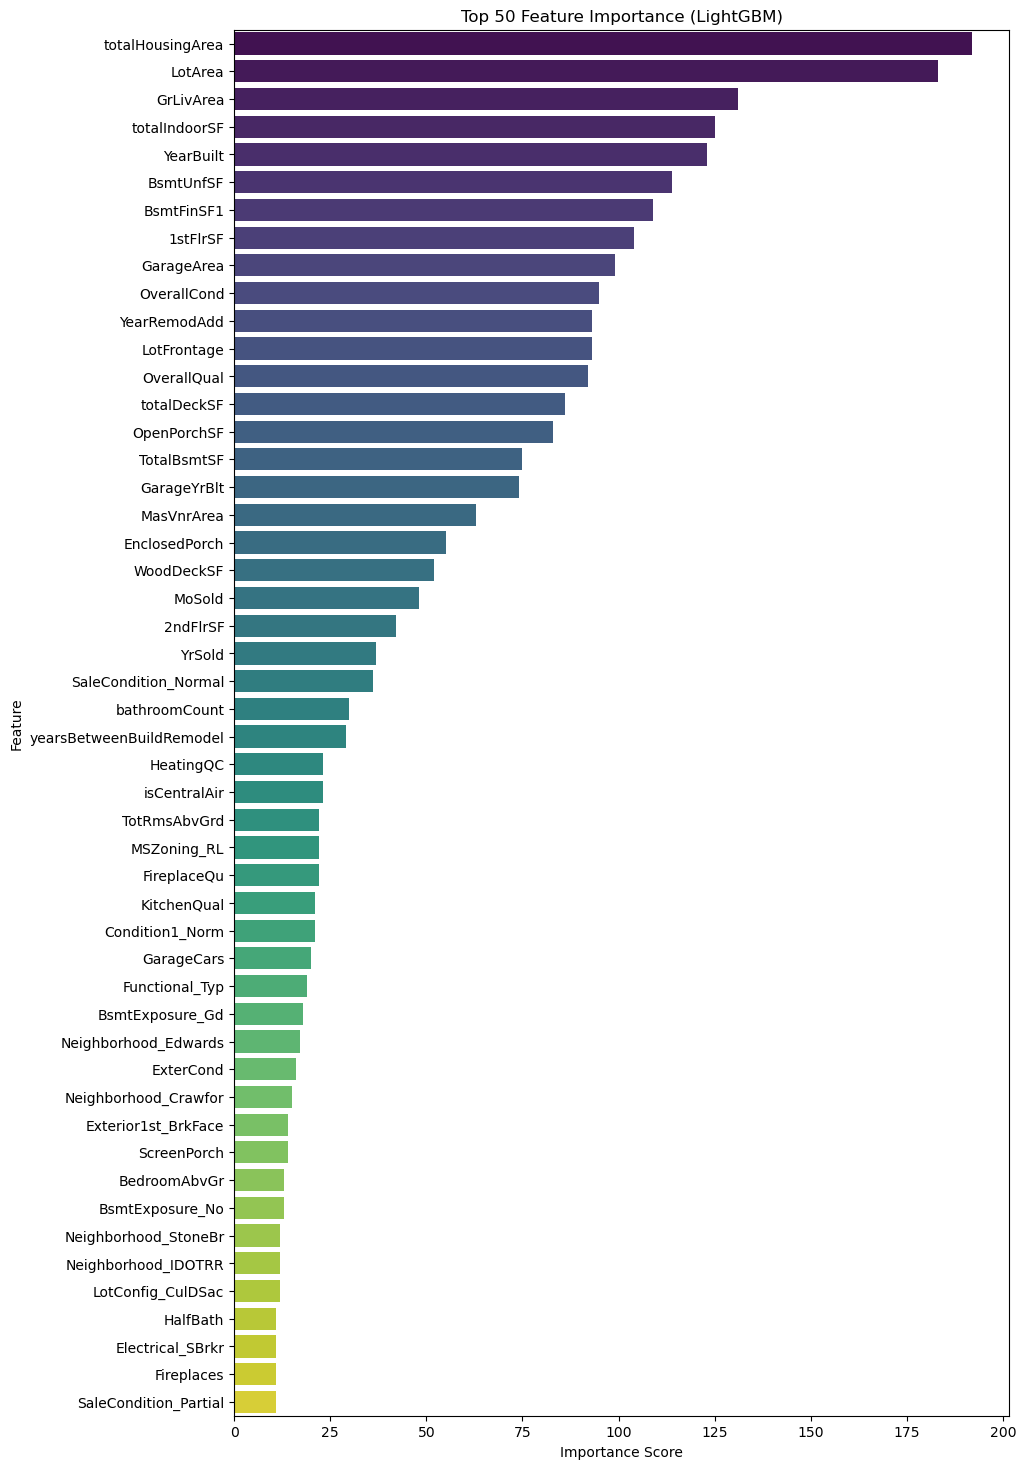

In [32]:
# Get feature importance
feature_importance = lgbm.feature_importances_
feature_names = features.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 18))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(50), palette='viridis')
plt.title('Top 50 Feature Importance (LightGBM)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

## Notes
- totalHousingArea is most important feature, was engineered
    - totalIndoorSurfaceArea also engineered but may overlap with totalHousingArea
    - 8 of top 10 features relate to housing area
- Should attempt to scale back number of features